# PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis of MNIST digits dataset and reducing dimension to 2-D and reducing it w.r.t. algorithm using maximum variance retention.

#### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### LOADING DATASET

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [17]:
digits.target.shape

(1797,)

In [18]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df.shape

(1797, 64)

In [9]:
first_img = digits.data[0]
first_img = first_img.reshape(8, 8)
first_img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

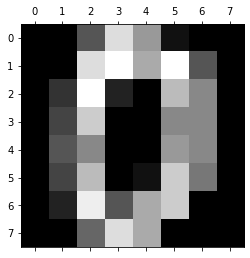

In [10]:
%matplotlib inline

plt.gray()
plt.matshow(first_img)

In [11]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Data Preprocessing

#### SCALING THE DATA

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
data = scaler.fit_transform(df)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#### TRAIN-TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### Applying Logistic Regression to the scaled data

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(x_test)

In [48]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.9985152190051967, 0.9711111111111111)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_pred, y_test)

0.9580046270577575

## Applying PCA using 95% variance retention

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(0.95) # retain 95% variance and come with any number of features you find important with 95% variance retention

In [53]:
x_pca = pca.fit_transform(data)

In [54]:
x_pca.shape

(1797, 40)

40 features are retained

In [55]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [56]:
pca.n_components

0.95

In [57]:
pca.n_components_

40

#### Prediction using Logistic Regression

In [58]:
x_T, x_t, y_T, y_t = train_test_split(x_pca, digits.target, test_size=0.25, random_state=42)

In [59]:
print(x_T.shape)

(1347, 40)


In [60]:
lor = LogisticRegression()

In [61]:
lor.fit(x_T, y_T)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [62]:
pred = lor.predict(x_t)

In [63]:
lor.score(x_T, y_T), lor.score(x_t, y_t)

(0.9925760950259837, 0.9711111111111111)

In [64]:
r2_score(pred, y_t)

0.9631194409148666

Results are about as same as applying only Logistic Regression

## Applying PCA using reduction of dimension to 2

In [65]:
dr = PCA(n_components=2)

In [66]:
x_dr = dr.fit_transform(data)

In [67]:
x_dr.shape

(1797, 2)

In [69]:
dr.explained_variance_ratio_

array([0.12033916, 0.09561054])

Applying Logistic Regression to the dataset with reduced dimension of 2

In [68]:
x_Tr, x_te, y_Tr, y_te = train_test_split(x_dr, digits.target, test_size=0.25, random_state=42)

lr2 = LogisticRegression()
lr2.fit(x_Tr, y_Tr)
preds = lr2.predict(x_te)
print(lr2.score(x_Tr, y_Tr), lr2.score(x_te, y_te))
print(r2_score(preds, y_te))

0.5582776540460282 0.52
-0.4153535288411663


Score and accuracy of model is affected on deducing dimensions